In [17]:
#importing necessary libraries and functions for images and mathematical functions
import numpy as np                  #numpy library for mathematical functions
import matplotlib.pyplot as plt     #matplotlib for plotting of the image
from PIL import Image, ImageOps     #Pillow library for openinng image
from scipy.fft import fft2, ifft2   #fourier transform and inverse fourier transform for 2D array

In [41]:


# Để bỏ qua lỗi chia cho số không
np.seterr(divide='ignore', invalid='ignore')

# chức năng vẽ 2 ảnh cạnh nhau thành 2 hàng
def plot(data, title, n=2):
    plot.i += 1
    plt.xticks([])
    plt.yticks([])
    plt.subplot(n,2,plot.i)
    plt.imshow(data)
    if (plot.i == 1):
        pass
    else:
        plt.gray()
    plt.title(title)

#biến để vẽ đồ thị hình ảnh
plot.i = 0

In [19]:


#chức năng tạo bộ lọc với kích thước hình ảnh
def creating_filter(img_path="t.jpg"):
    
    #mở hình ảnh với đường dẫn đầy đủ của hình ảnh
    global input_image
    input_image = Image.open(img_path)
    #chuyển đổi hình ảnh từ màu sang thang độ xám. Nó chuyển đổi 3D thành 2D
    input_image_gs = ImageOps.grayscale(input_image)

    #Printing Image format, dimension and mode in which it is opened.
    """print(input_image.format)
    print(input_image_gs.size)
    print(input_image_gs.mode)"""

    #plotting image using pyplot 
    """plt.imshow(input_image_gs)
    plt.gray()"""
    #plt.show()

    #chuyển đổi hình ảnh thành mảng có nhiều mảng và tìm kích thước của nó
    input_image_gs_array = np.asarray(input_image_gs)
    dimensions = input_image_gs_array.shape

    #Sao chép kích thước hình ảnh cho bộ lọc
    filter_height = dimensions[0]
    filter_width = dimensions[1]

    #tìm biến đổi phạm vi của hình ảnh bằng chức năng fft2 của scipy
    fourier_transform = fft2(input_image_gs)
    #round_function = lambda x: round(x,2)
    #fourier_transform_rounded = [list(map(round_function, i)) for i in fourier_transform]
    #print(fourier_transform)

    #Making fix order
    #n = order
    #Cut-off frequency value
    #D0 = cutoff

    #Thiết kế bộ lọc
    u = np.arange(0,filter_height)
    v = np.arange(0,filter_width)
    #print(u,v)

    #chuyển đổi mảng u với các giá trị (filter_height/2, -filter_height/2)
    idx = []
    for i in u:
        if(i> (filter_height/2)):
            idx.append(i)
    #print(u[idx])
    #print(idx)
    u[idx] = (u[idx] - filter_height)
    #print(u)

    #chuyển đổi mảng v với các giá trị (filter_width/2, -filter_width/2)
    idy = []
    for i in v:
        if(i > (filter_width/2)):
            idy.append(i)
    v[idy] = (v[idy] - filter_width)

    #print(v[idy])
    #print(idy)
    #print(v)
    #chuyển đổi danh sách thành mảng numpy
    u = np.array(u)
    v = np.array(v)
    #print(u,v)

    #meshgrid là hàm trả về tọa độ của v và u. Danh sách V với mỗi hàng là bản sao của v và danh sách U với mỗi cột là bản sao của u
    U, V = np.meshgrid(v,u)
    #print(U.shape, V.shape)
    #print(U)
    #trả về bộ lọc và mảng hình ảnh gốc
    return U, V, input_image_gs_array, fourier_transform

In [20]:
#functions hP
def butterworth_highpass_function(img_path="t.jpg",order=3,cutoff=10):

    #tạo bộ lọc cho chức năng
    U, V, input_image_gs_array, fourier_transform = creating_filter(img_path=img_path)

    #Lập lệnh sửa chữa
    n = order
    #Giá trị  cắt
    D0 = cutoff

    #khoảng cách Euclide
    D = np.sqrt(U**2 + V**2)

    #Xác định mask filter
    H = (1/(1 + (D0/D)**(2*n)))

    #Kết hợp giữa hình ảnh biến đổi Fourier Transformed image and the mask
    G = H * fourier_transform

    #finding inverse fourier transform of the image using ifft2 function of scipy
    output_image_array = ifft2(G)
    #tách phần thực khỏi số phức
    output_image_array_real = output_image_array.real
    #print(output_image_array_real.shape)

    #plotting original image and transformed image
    n=str(n)
    D0=str(D0)
    name = str("BHPF with n="+n+" Cut-off frequency="+D0)
    """plot(input_image_gs_array,"Orignal Image")
    plot(output_image_array_real,name)
    plt.show()"""

    return input_image, output_image_array_real, name

In [21]:
butterworth_highpass_function()

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1500x1500>,
 array([[0.00655257, 0.00668604, 0.00681627, ..., 0.00613214, 0.00627568,
         0.0064158 ],
        [0.00676978, 0.00690238, 0.00703149, ..., 0.00635051, 0.00649388,
         0.00663363],
        [0.00698197, 0.00711354, 0.00724134, ..., 0.00656437, 0.00670742,
         0.00684661],
        ...,
        [0.00587401, 0.0060091 , 0.00614169, ..., 0.00545288, 0.00559598,
         0.00573633],
        [0.00610438, 0.00623909, 0.00637104, ..., 0.00568304, 0.00582643,
         0.00596686],
        [0.00633067, 0.00646484, 0.00659601, ..., 0.00590956, 0.0060531 ,
         0.00619345]]),
 'BHPF with n=3 Cut-off frequency=10')

In [34]:



#functions LP
def butterworth_lowpass_function(img_path="t.jpg",order=3,cutoff=10):

    #tạo bộ lọc cho chức năng
    U, V, input_image_gs_array, fourier_transform = creating_filter(img_path=img_path)

    #Making fix order
    n = order
    #Cut-off frequency value
    D0 = cutoff

    #Euclidean distance
    D = np.sqrt((U**2 + V**2))

    #Xác định Mask
    H = (1/(1 + (D/D0)**(2*n)))
    #converting high pass to low pass
    #HL=1-H
    
    #Kết hợp giữa hình ảnh biến đổi Fourier Transformed image and the mask
    G = H * fourier_transform

    #finding inverse fourier transform of the image using ifft2 function of scipy
    output_image_array = ifft2(G)
    #separating real part from complex numbers
    output_image_array_real = output_image_array.real
    #print(output_image_array_real.shape)

    #plotting original image and transformed image
    n=str(n)
    D0=str(D0)
    name = str("BLPF with n="+n+" Cut-off frequency="+D0)
    # """plot(input_image_gs_array,"Orignal Image")
    # plot(output_image_array_real,name)
    # plt.show()"""

    return input_image_gs_array, output_image_array_real, name

#main function which will convert and give output image as converted to highpass and lowpass butterworth filter
def butterworth_HP_LP_filter(img_path="t.jpg",order=3,cutoff=10):
    
    #give image path using keyword img_path=, order by order= (by default 3), cutoff fq by cutoff= (by default 10) for both HP and LP
    org, output, title = butterworth_highpass_function(img_path=img_path, order=order, cutoff=cutoff)
    plot(org,"Original")
    plot(output,title)

    #give image path using keyword img_path=, order by order= (by default 3), cutoff fq by cutoff= (by default 10) for both HP and LP
    org, output, title = butterworth_lowpass_function(img_path=img_path, order=order, cutoff=cutoff)
    plot(org,"Grayscale")
    plot(output,title)

    #show the image
    plt.show()

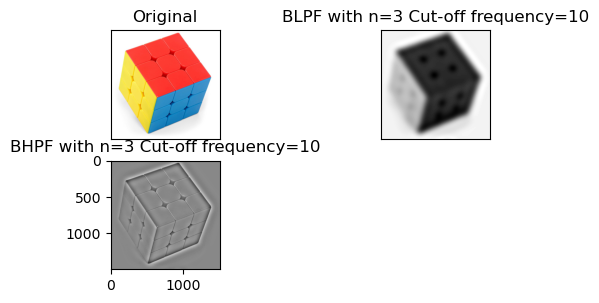

In [47]:
#function to plot all images in one frame, both butterworth r
def plot_together(img_path="t.jpg",order=3,cutoff=10):
    
    #give image path using keyword img_path=, order by order= (by default 3), cutoff fq by cutoff= (by default 10) for both HP and LP
    org, output, title = butterworth_highpass_function(img_path=img_path, order=3, cutoff=10)
    #plotting image with colour
    plot(org,"Original",n=3)
    
    org1, output1, title1 = butterworth_lowpass_function(img_path=img_path, order=3, cutoff=cutoff)
    #plotting grayscale image
    # plot(org1,"Grayscale",n=3)
    #plotting butterworth lowpass
    plot(output1,title1,n=3)
    #plotting butterworth highpass
    plot(output,title,n=3)

   
    #show the image
    plt.show()
plot_together()
plot.i=0


# A


ValueError: num must be 1 <= num <= 4, not 7

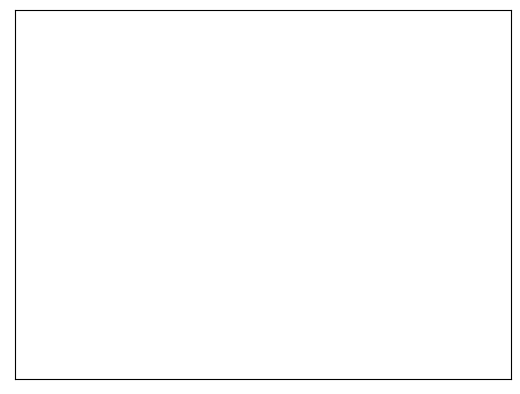

In [9]:



#function to perform lowpass gaussian function
def gaussian_lowpass_function(img_path="t.jpg",cutoff=10):
    
    #creating filter for the function
    U, V, input_image_gs_array, fourier_transform = creating_filter(img_path=img_path)
    
    #Cut-off frequency value
    D0 = cutoff

    #Euclidean distance
    D = (U**2 + V**2)
    D = -(D/(2*(D0**2)))
    H = np.exp(D)

    #Convolution between the Fourier Transformed image and the mask
    G = H * fourier_transform

    #finding inverse fourier transform of the image using ifft2 function of scipy
    output_image_array = ifft2(G)
    #separating real part from complex numbers
    output_image_array_real = output_image_array.real
    #print(output_image_array_real.shape)


    #plotting original image and transformed image
    D0=str(D0)
    name = str("Gaussian Lowpass Filter with Cut-off frequency="+D0)
    """plot(input_image_gs_array,"Orignal Image")
    plot(output_image_array_real,name)
    plt.show()"""
    return input_image, output_image_array_real, name

#function to peerform gaussian highpass filter
def gaussian_highpass_function(img_path="t.jpg",cutoff=10):
    
    #creating filter for the function
    U, V, input_image_gs_array, fourier_transform = creating_filter(img_path=img_path)
    
    #Cut-off frequency value
    D0 = cutoff

    #Euclidean distance
    D = (U**2 + V**2)
    D = -(D/(2*(D0**2)))
    H = np.exp(D)
    #converting lowpass to highpass
    HP = 1 - H

    #Convolution between the Fourier Transformed image and the mask
    G = HP * fourier_transform

    #finding inverse fourier transform of the image using ifft2 function of scipy
    output_image_array = ifft2(G)
    #separating real part from complex numbers
    output_image_array_real = output_image_array.real
    #print(output_image_array_real.shape)

    #plotting original image and transformed image
    D0=str(D0)
    name = str("Gaussian Highpass Filter with Cut-off frequency="+D0)
    """plot(input_image_gs_array,"Orignal Image")
    plot(output_image_array_real,name)
    plt.show()"""
    return input_image_gs_array, output_image_array_real, name

#main function which will convert and give output image as converted to highpass and lowpass butterworth filter
def gaussian_LP_HP_filter(img_path="t.jpg",cutoff=10):
    
    #give image path using keyword img_path=, order by order= (by default 3), cutoff fq by cutoff= (by default 10) for both HP and LP
    org, output, title = gaussian_lowpass_function(img_path=img_path, cutoff=cutoff)
    plot(org,"Original")
    plot(output,title)

    #give image path using keyword img_path=, order by order= (by default 3), cutoff fq by cutoff= (by default 10) for both HP and LP
    org, output, title = gaussian_highpass_function(img_path=img_path, cutoff=cutoff)
    plot(org,"Grayscale")
    plot(output,title)

    #show the image
    plt.show()

#function to plot all images in one frame, both butterworth and gaussian filter
def plot_together(img_path="t.jpg",order=3,cutoff=10):
    
    #give image path using keyword img_path=, order by order= (by default 3), cutoff fq by cutoff= (by default 10) for both HP and LP
    org, output, title = butterworth_highpass_function(img_path=img_path, order=5, cutoff=20)
    #plotting image with colour
    plot(org,"Original",n=3)
    
    org1, output1, title1 = butterworth_lowpass_function(img_path=img_path, order=10, cutoff=cutoff)
    #plotting grayscale image
    plot(org1,"Grayscale",n=3)
    #plotting butterworth lowpass
    plot(output1,title1,n=3)
    #plotting butterworth highpass
    plot(output,title,n=3)

    #give image path using keyword img_path=, order by order= (by default 3), cutoff fq by cutoff= (by default 10) for both HP and LP
    org, output, title = gaussian_lowpass_function(img_path=img_path, cutoff=8)
    #plotting gaussian lowpass
    plot(output,title,n=3)

    #give image path using keyword img_path=, order by order= (by default 3), cutoff fq by cutoff= (by default 10) for both HP and LP
    org, output, title = gaussian_highpass_function(img_path=img_path, cutoff=5)
    #plotting gaussian highpass
    plot(output,title,n=3)

    #show the image
    plt.show()

def plot_separate():
    #executing main function
    #displaying output of butterworth filter
    butterworth_HP_LP_filter(img_path="t.jpg",order=3,cutoff=25)

    #changing value of plot.i = 0 for printing new image
    plot.i=0

    #displaying output of gaussian filter
    gaussian_LP_HP_filter(img_path="t.jpg",cutoff=35)

#main function to plot and compare
#function to first separately show output
plot_separate()
plot.i=0
#function to plot and compare together
plot_together()